In [2]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [3]:

# reading a csv file using pandas library
wcat=pd.read_csv("wc-at.csv")
wcat.columns




Index(['Waist', 'AT'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x122816430>,
 'caps': [<matplotlib.lines.Line2D at 0x122816af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122816160>],
 'medians': [<matplotlib.lines.Line2D at 0x12282b1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12282b550>],
 'means': []}

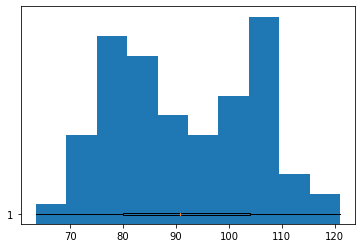

In [4]:
plt.hist(wcat.Waist)
plt.boxplot(wcat.Waist,0,"rs",0)





{'whiskers': [<matplotlib.lines.Line2D at 0x1228ded90>,
 'caps': [<matplotlib.lines.Line2D at 0x1228ee490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1228deac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1228eeb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1228eeeb0>],
 'means': []}

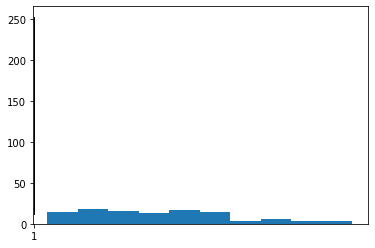

In [5]:
plt.hist(wcat.AT)
plt.boxplot(wcat.AT)




Text(0, 0.5, 'AT')

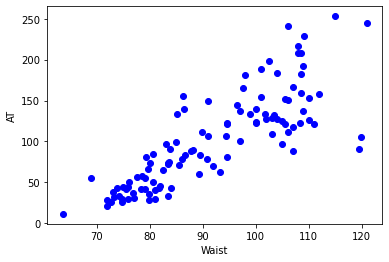

In [6]:
plt.plot(wcat.Waist,wcat.AT,"bo");plt.xlabel("Waist");plt.ylabel("AT")


In [7]:
wcat.AT.corr(wcat.Waist) # # correlation value between X and Y
np.corrcoef(wcat.AT,wcat.Waist)



array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [8]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wcat).fit()

# For getting coefficients of the varibles used in equation
model.params

# P-values for the variables and R-squared value for prepared model
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.62e-27
Time:                        13:20:30   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.818557812895853

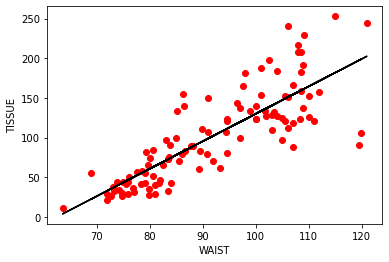

In [9]:
model.conf_int(0.05) # 95% confidence interval

pred = model.predict(wcat.iloc[:,0]) # Predicted values of AT using the model

# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red');plt.plot(wcat['Waist'],pred,color='black');plt.xlabel('WAIST');plt.ylabel('TISSUE')

pred.corr(wcat.AT) # 0.81




                         0            1
Intercept     -1579.905632 -1076.778346
np.log(Waist)   261.384641   372.886487


Text(0, 0.5, 'TISSUE')

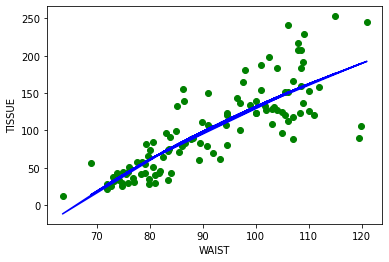

In [10]:
# Transforming variables for accuracy
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))
pred2.corr(wcat.AT)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');plt.plot(wcat['Waist'],pred2,color='blue');plt.xlabel('WAIST');plt.ylabel('TISSUE')




In [11]:
# Exponential transformation
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.68e-30
Time:                        13:20:30   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                  0         1
Intercept  0.130939  1.351102
Waist      0.033684  0.046820


Text(0, 0.5, 'Actual')

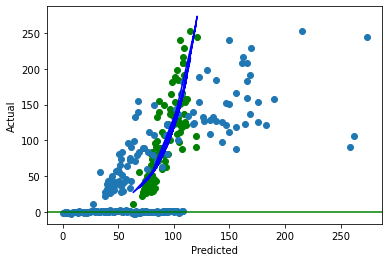

In [12]:
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(wcat['Waist']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3
pred3.corr(wcat.AT)
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green');plt.plot(wcat.Waist,np.exp(pred_log),color='blue');plt.xlabel('WAIST');plt.ylabel('TISSUE')
resid_3 = pred3-wcat.AT
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

# Predicted vs actual values
plt.scatter(x=pred3,y=wcat.AT);plt.xlabel("Predicted");plt.ylabel("Actual")



In [13]:


# Quadratic model
wcat["Waist_Sq"] = wcat.Waist*wcat.Waist
model_quad = smf.ols("AT~Waist+Waist_Sq",data=wcat).fit()

model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 17 May 2021   Prob (F-statistic):           8.37e-27
Time:                        13:20:30   Log-Likelihood:                -533.67
No. Observations:                 109   AIC:                             1073.
Df Residuals:                     106   BIC:                             1081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -466.2887    156.964     -2.971      0.004    -777.485    -155.092
Waist          8.9709      3.431      2.614      0.010       2.168      15.774
Waist_Sq      -0.0297      0.018     -1.610      0.110      -0.066       0.007
==============================================================================
Omnibus:                        3.682   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.054
Skew:                           0.338   Prob(JB):                        0.217
Kurtosis:                       3.465   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:

#pred_quad = model_quad.predict(wcat['Waist']+wcat['Waist_Sq'])

#model_quad.conf_int(0.05) # 
#plt.scatter(wcat.Waist,wcat.AT,c="b");plt.plot(wcat.Waist,pred_quad,"r")

#plt.scatter(np.arange(109),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

#plt.hist(model_quad.resid_pearson) # histogram for residual values 



In [18]:
wcat.head()

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


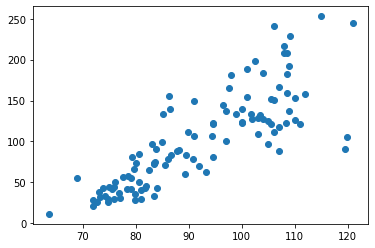

In [20]:

############################### Implementing the Linear Regression model from sklearn library

from sklearn.linear_model import LinearRegression
import numpy as np
plt.scatter(wcat.Waist,wcat.AT)
model1 = LinearRegression()
model1.fit(wcat.Waist.values.reshape(-1,1),wcat.AT)
pred1 = model1.predict(wcat.Waist.values.reshape(-1,1))





In [21]:
# Adjusted R-Squared value
model1.score(wcat.Waist.values.reshape(-1,1),wcat.AT)# 0.6700
rmse1 = np.sqrt(np.mean((pred1-wcat.AT)**2)) # 32.760
model1.coef_
model1.intercept_



-215.98148796164242

(array([ 3.,  8.,  6., 14., 33., 27., 14.,  2.,  0.,  2.]),
 array([-90.34239241, -70.57934363, -50.81629486, -31.05324609,
        -11.29019731,   8.47285146,  28.23590023,  47.99894901,
         67.76199778,  87.52504655, 107.28809533]),
 <BarContainer object of 10 artists>)

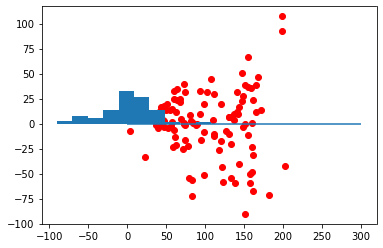

In [20]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 
# checking normal distribution for residual
plt.hist(pred1-wcat.AT)



In [21]:
### Fitting Quadratic Regression 
wcat["Waist_sqrd"] = wcat.Waist*wcat.Waist
model2 = LinearRegression()
model2.fit(X = wcat.iloc[:,[0,2]],y=wcat.AT)
pred2 = model2.predict(wcat.iloc[:,[0,2]])
# Adjusted R-Squared value
model2.score(wcat.iloc[:,[0,2]],wcat.AT)# 0.67791
rmse2 = np.sqrt(np.mean((pred2-wcat.AT)**2)) # 32.366
model2.coef_
model2.intercept_



-466.2887065515867

((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

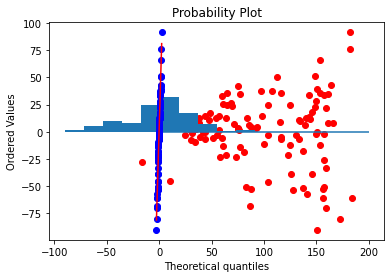

In [22]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  
# Checking normal distribution
plt.hist(pred2-wcat.AT)
import pylab
import scipy.stats as st
st.probplot(pred2-wcat.AT,dist="norm",plot=pylab)



In [22]:
# Let us prepare a model by applying transformation on dependent variable
wcat["AT_sqrt"] = np.sqrt(wcat.AT)

model3 = LinearRegression()
model3.fit(X = wcat.iloc[:,[0,2]],y=wcat.AT_sqrt)
pred3 = model3.predict(wcat.iloc[:,[0,2]])


In [24]:
# Adjusted R-Squared value
model3.score(wcat.iloc[:,[0,2]],wcat.AT_sqrt)# 0.74051
rmse3 = np.sqrt(np.mean(((pred3)**2-wcat.AT)**2)) # 32.0507
model3.coef_
model3.intercept_





-32.0138693571079

((array([-2.49269012, -2.16005351, -1.96810538, -1.829376  , -1.71891041,
         -1.62614848, -1.54558238, -1.4739582 , -1.40918581, -1.34983904,
         -1.2948992 , -1.24361202, -1.19540258, -1.14982207, -1.10651298,
         -1.06518563, -1.02560179, -0.98756301, -0.95090206, -0.9154766 ,
         -0.88116436, -0.84785944, -0.81546946, -0.78391323, -0.75311899,
         -0.72302293, -0.69356797, -0.66470285, -0.63638125, -0.60856118,
         -0.58120436, -0.55427579, -0.52774332, -0.5015773 , -0.47575031,
         -0.45023686, -0.42501321, -0.40005714, -0.3753478 , -0.35086557,
         -0.32659187, -0.30250912, -0.27860058, -0.25485026, -0.23124286,
         -0.20776364, -0.18439842, -0.16113345, -0.13795538, -0.1148512 ,
         -0.09180817, -0.06881379, -0.04585574, -0.02292185,  0.        ,
          0.02292185,  0.04585574,  0.06881379,  0.09180817,  0.1148512 ,
          0.13795538,  0.16113345,  0.18439842,  0.20776364,  0.23124286,
          0.25485026,  0.27860058,  0.

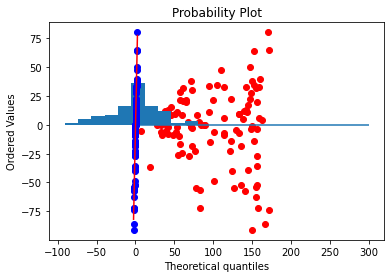

In [25]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred3)**2,((pred3)**2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  
# checking normal distribution for residuals 
plt.hist((pred3)**2-wcat.AT)
st.probplot((pred3)**2-wcat.AT,dist="norm",plot=pylab)



In [26]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = wcat.Waist.values.reshape(-1,1),y=wcat.AT_sqrt)
pred4 = model4.predict(wcat.Waist.values.reshape(-1,1))
# Adjusted R-Squared value
model4.score(wcat.Waist.values.reshape(-1,1),wcat.AT_sqrt)# 0.7096
rmse4 = np.sqrt(np.mean(((pred4)**2-wcat.AT)**2)) # 34.165
model4.coef_
model4.intercept_



-6.898398342272843

(array([ 2., 11.,  6., 25., 37., 22.,  3.,  1.,  0.,  2.]),
 array([-91.81765069, -70.16719522, -48.51673975, -26.86628428,
         -5.21582881,  16.43462666,  38.08508212,  59.73553759,
         81.38599306, 103.03644853, 124.686904  ]),
 <BarContainer object of 10 artists>)

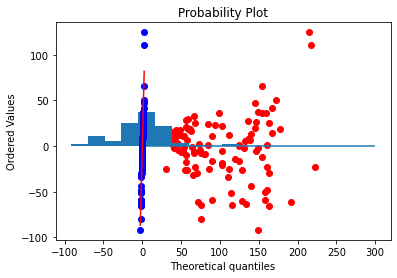

In [27]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred4)**2,((pred4)**2-wcat.AT),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

st.probplot((pred4)**2-wcat.AT,dist="norm",plot=pylab)

# Checking normal distribution for residuals 
plt.hist((pred4)**2-wcat.AT)



